# Analisis Unsur Kimia Pembentuk Kaca
### Disusun oleh : Rizky Rindi Arumingdien

<hr />
Project ini bertujuan untuk menganalisis unsur kimia pada kaca serta mengelompokkan kaca berdasarkan unsur-unsur tersebut.
Pertanyaan yang akan dijawab melalui analisis ini adalah:
<ul style="list-style-type:circle;">
  <li>Berapa persen berat unsur kimia dalam oksida yang dihasilkan oleh nilai indeks bias tertentu?</li>
  <li>Jenis kaca apa yang terbuat dari unsur-unsur tersebut?</li>
</ul> 
Sumber data: File dataset bisa dicari di <a href="https://archive.ics.uci.edu/ml/datasets/glass+identification">glass.data</a>




<b>Informasi dataset</b>:

Vina melakukan uji perbandingan <i>rule-based system</i> miliknya, BEAGLE, algoritma nearest-neighbor dan analisis diskriminan.
BEAGLE adalah produk yang tersedia di VRS Consulting, Inc .; 4676 Admiralty Way, Suite 206; Marina Del Ray, CA 90292 (213) 827-7890 dan FAX: -3189.

Studi tentang klasifikasi jenis kaca dimotivasi oleh penyelidikan kriminologis. Di TKP, kaca yang tertinggal dapat digunakan sebagai bukti jika diidentifikasi dengan benar!


<b>Informasi Atribut:</b>

1. Id number: 1 to 214 
2. RI: refractive index 
3. Na: Sodium (unit pengukuran: persen berat dalam oksida, begitu juga atribut 4-10) 
4. Mg: Magnesium 
5. Al: Aluminum 
6. Si: Silicon 
7. K: Potassium 
8. Ca: Calcium 
9. Ba: Barium 
10. Fe: Iron 
11. Type of glass: (class attribute)
    - building_windows_float_processed 
    - building_windows_non_float_processed 
    - vehicle_windows_float_processed
    - vehicle_windows_non_float_processed (none in this database) 
    - containers 
    - tableware 
    - headlamps

Langkah pertama yang dilakukan adalah melakukan <i>loading data</i> glass.data.

In [1]:
#ambil data dari glass.data & memberi nama kolom
import s3fs
s3 = s3fs.S3FileSystem()

s3.ls('latih-bucket')

import pandas as pd

with s3.open('latih-bucket/glass.data', 'rb') as f:
    data = pd.read_csv(f)
    data.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
data

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1


### Data Cleaning dan Data Preparing
Selanjutnya, akan dilakukan pengecekan apakah ada data <i><b>null</b></i> di setiap kolom pada data di atas.

In [2]:
data[data['ID'].isnull()]
data[data['RI'].isnull()]
data[data['Na'].isnull()]
data[data['Mg'].isnull()]
data[data['Al'].isnull()]
data[data['Si'].isnull()]
data[data['K'].isnull()]
data[data['Ca'].isnull()]
data[data['Ba'].isnull()]
data[data['Fe'].isnull()]
data[data['Type'].isnull()]

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


>Ternyata tidak ditemukan adanya data <i>null</i> setelah dilakukan pengecekan, sehingga tidak perlu dilakukan <i>data cleaning</i> & <i>data preparing</i>.

### Scatter Plot
Langkah berikutnya yaitu membuat <i><b>scatter plot</b></i> dari masing-masing features untuk mengetahui apakah ada korelasi di antara features tersebut dengan menggunakan fungsi <i>scatter_matrix</i>.

In [3]:
from pandas.plotting import scatter_matrix
data_checking = data[data["Type"] == 1]

plt = scatter_matrix(data_checking, figsize  = [20, 20])
for ax in plt.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  ax.set_xlim(boundaries_list[j])
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  ax.set_ylim(boundaries_list[i])
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  ax.set_xlim(boundaries_list[i])


Atau dengan menjadikan RI (Refractive Index) sebagai Independent Variable dan unsur (Na/Mg/Al/Si/K/Ca/Ba/Fe) sebagai Dependent Variable.

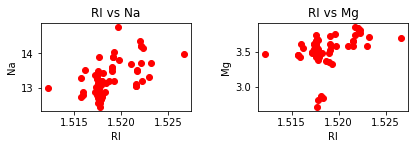

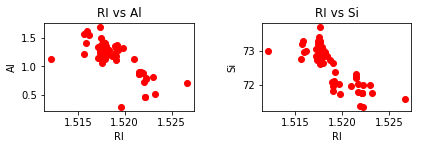

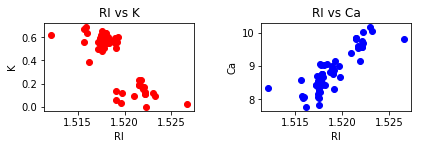

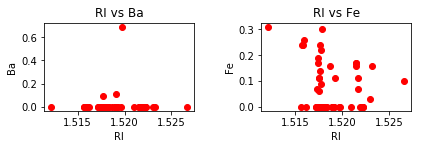

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplot(221)
# RI vs Na
data_checking = data[data["Type"] == 1]
x = data_checking["RI"]
y = data_checking["Na"]
plt.plot(x,y,'ro')
plt.title("RI vs Na")
plt.xlabel("RI")
plt.ylabel("Na")

# RI vs Mg
plt.subplot(222)
data_checking = data[data["Type"] == 1]
x = data_checking["RI"]
y = data_checking["Mg"]
plt.plot(x,y,'ro')
plt.title("RI vs Mg")
plt.xlabel("RI")
plt.ylabel("Mg")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75,
                    wspace=0.45)

plt.show()

# RI vs Al
plt.subplot(221)
data_checking = data[data["Type"] == 1]
x = data_checking["RI"]
y = data_checking["Al"]
plt.plot(x,y,'ro')
plt.title("RI vs Al")
plt.xlabel("RI")
plt.ylabel("Al")

# RI vs Si
plt.subplot(222)
data_checking = data[data["Type"] == 1]
x = data_checking["RI"]
y = data_checking["Si"]
plt.plot(x,y,'ro')
plt.title("RI vs Si")
plt.xlabel("RI")
plt.ylabel("Si")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75,
                    wspace=0.45)

plt.show()

# RI vs K
plt.subplot(221)
data_checking = data[data["Type"] == 1]
x = data_checking["RI"]
y = data_checking["K"]
plt.plot(x,y,'ro')
plt.title("RI vs K")
plt.xlabel("RI")
plt.ylabel("K")

# RI vs Ca
plt.subplot(222)
data_checking = data[data["Type"] == 1]
x = data_checking["RI"]
y = data_checking["Ca"]
plt.plot(x,y,'bo')
plt.title("RI vs Ca")
plt.xlabel("RI")
plt.ylabel("Ca")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75,
                    wspace=0.45)

plt.show()

# RI vs Ba
plt.subplot(221)
data_checking = data[data["Type"] == 1]
x = data_checking["RI"]
y = data_checking["Ba"]
plt.plot(x,y,'ro')
plt.title("RI vs Ba")
plt.xlabel("RI")
plt.ylabel("Ba")

# RI vs Fe
plt.subplot(222)
data_checking = data[data["Type"] == 1]
x = data_checking["RI"]
y = data_checking["Fe"]
plt.plot(x,y,'ro')
plt.title("RI vs Fe")
plt.xlabel("RI")
plt.ylabel("Fe")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75,
                    wspace=0.45)

plt.show()

> Berdasarkan <i>scatter plot</i> di atas, sepertinya terdapat korelasi antara RI dengan Ca karena ada pola linier yang menunjukkan bahwa variable RI dan Ca bergerak atau berubah secara bersamaan (linier).

### Statistik Deskriptif
Bagian ini menjelaskan hubungan antara Refractive Index (RI) sebagai variabel bebas dan Kalsium (Ca) sebagai variabel terikat.

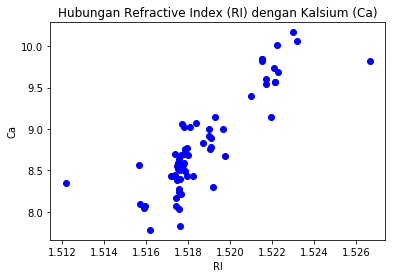

In [5]:
data_checking = data[data["Type"] == 1]
x = data_checking["RI"]
y = data_checking["Ca"]
plt.plot(x,y,'bo')
plt.title("Hubungan Refractive Index (RI) dengan Kalsium (Ca)")
plt.xlabel("RI")
plt.ylabel("Ca")
plt.show()

><i>Scatter plot</i> di atas menujukkan adanya korelasi bahwa nilai Refractive Index (RI) mempengaruhi jumlah prosentase berat Kalsium (Ca) dalam oksida.

### Analisis Model Regresi
Setelah diketahui adanya korelasi antara RI dan Ca, langkah berikutnya yaitu membuat analisis model regresi (linear atau nonlinear). Scatter plot pada bagian Statistik Deskriptif akan ditampilkan lagi supaya memperjelas bagian ini.

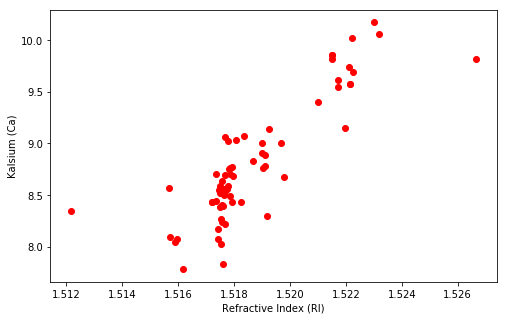

In [6]:
#membuat scatter plot u/ menentukan fungsi linear mana yg akan digunakan

plt.figure(figsize=(8,5))
x_data = data_checking["RI"].values
y_data = data_checking["Ca"].values
plt.plot(x_data, y_data, 'ro')
plt.xlabel('Refractive Index (RI)')
plt.ylabel('Kalsium (Ca)')
plt.show()

Untuk mengetahui data di atas dapat didekati dengan model regresi linear atau tidak, mari kita perhatikan grafik berikut :

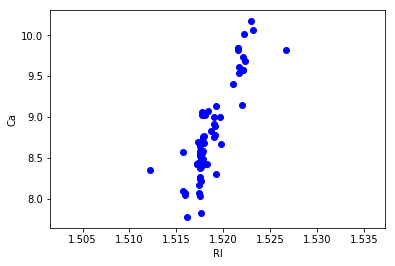

Coefficients:  [[224.24201201]]
Intercept:  [-331.76353776]


Text(0, 0.5, 'Ca')

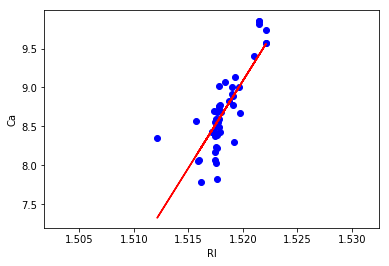

In [7]:
cdf = data_checking[['RI','Ca']]
cdf.head(9)

plt.scatter(cdf.RI, cdf.Ca,  color='blue')
plt.xlabel("RI")
plt.ylabel("Ca")
plt.show()

msk = np.random.rand(len(data_checking)) < 0.8
train = cdf[msk]
test = cdf[~msk]

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['RI']])
train_y = np.asanyarray(train[['Ca']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(train.RI, train.Ca,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("RI")
plt.ylabel("Ca")

>Dari grafik di atas, sepertinya data ini dapat didekati menggunakan model regresi linier. Tetapi, mari kita lakukan analisis model regresi linier dan non-linier (sigmoid, ekpsonensial, kubik dan kuadratik) yang terbaik berdasarkan MAE, MSE, dan R2.

In [8]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import numpy as np


# Fungsi Linear
def lnr(x, Beta_0, Beta_1):
    y = Beta_0 + Beta_1*x
    return y

# Fungsi Sigmoid
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

# Fungsi Eksponensial
def expo(x,Beta_0, Beta_1):
    y = Beta_0*np.exp(Beta_1*x)
    return y

# Fungsi Kubik
def qubic(x,Beta_0,Beta_1,Beta_2,Beta_3):
    y = Beta_0+Beta_1*x+Beta_2*x**2+Beta_3*x**3
    return y

# Fungsi Kuadratik
def quad(x,Beta_0,Beta_1,Beta_2):
    y = Beta_0+Beta_1*x+Beta_2*x**2
    return y


# Lets normalize our data
xdata =x_data/max(x)
ydata =y_data/max(y)

# write your code here
# split data into train/test
#msk = np.random.rand(len(data_checking)) < 0.8 # 0.8 adl 80% data, sisanya u/ testing
np.random.seed(0) 
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]
#print(msk)

# build the model using train set
popt1, pcov = curve_fit(lnr, train_x, train_y, maxfev = 10000)
popt2, pcov = curve_fit(sigmoid, train_x, train_y, maxfev = 10000)
popt3, pcov = curve_fit(expo, train_x, train_y, maxfev = 10000)
popt4, pcov = curve_fit(qubic, train_x, train_y, maxfev = 10000)
popt5, pcov = curve_fit(quad, train_x, train_y, maxfev = 10000)

# predict using test set
y_hat1 = lnr(test_x, *popt1)
y_hat2 = sigmoid(test_x, *popt2)
y_hat3 = expo(test_x, *popt3)
y_hat4 = qubic(test_x, *popt4)
y_hat5 = quad(test_x, *popt5)

# evaluation
print("==Linear==")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat1 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.3f" % r2_score(y_hat1 , test_y) )

print("==Sigmoid==")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat2 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.3f" % r2_score(y_hat2 , test_y) )

print("==Exponential==")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat3 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.3f" % r2_score(y_hat3 , test_y) )

print("==Qubic==")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat4 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat4 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.3f" % r2_score(y_hat4 , test_y) )

print("==Quadratic==")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat5 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat5 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.3f" % r2_score(y_hat5 , test_y) )

# apabila R mendekati 1, berarti baik


==Linear==
Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.771
==Sigmoid==
Mean absolute error: 0.11
Residual sum of squares (MSE): 0.02
R2-score: 0.000
==Exponential==
Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.771
==Qubic==
Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.619
==Quadratic==
Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.620


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


>Dari beberapa model di atas, R2-score model linear lebih mendekati 1 daripada model yang lain, oleh karena itu akan digunakan model regresi linear pada data ini.

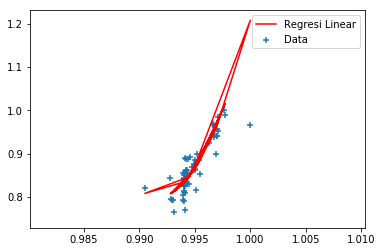

In [9]:
popt4, pcov = curve_fit(qubic, train_x.flatten(), train_y.flatten())
y = qubic(xdata, *popt4)
plt.scatter(xdata,ydata,marker = '+',label = "Data")
plt.plot(xdata,y,label = "Qubic",color = "red")

plt.legend(loc = "best")
plt.show()

Selanjutnya, untuk mengetahui tingkat tingkat keakuratannya makan dilakukan langkah-langkah berikut menggunakan sembarang metrik.

In [10]:
# Menyembunyikan Warning
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = data[['Type']]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}\n'.format(logreg.score(X_test, y_test)))

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}\n'.format(clf.score(X_test, y_test)))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}\n'
     .format(knn.score(X_test, y_test)))

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}\n'
     .format(lda.score(X_test, y_test)))

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}\n'
     .format(gnb.score(X_test, y_test)))

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.56
Accuracy of Logistic regression classifier on test set: 0.52

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.76

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.70

Accuracy of LDA classifier on training set: 0.67
Accuracy of LDA classifier on test set: 0.65

Accuracy of GNB classifier on training set: 0.57
Accuracy of GNB classifier on test set: 0.43

Accuracy of SVM classifier on training set: 0.51
Accuracy of SVM classifier on test set: 0.43


#### Dari dataset glass.data akan dibuat klasifikasi mengenai kaca.
Mari kita lihat beberapa baris pertama dari data

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Setiap baris dataset mewakili sebuah tipe kaca sebagaimana diwakili oleh beberapa fitur yang ada di kolom tabel.

Dataset ini memiliki 219 kaca dan 11 fitur:

In [12]:
print(data.shape)

(213, 11)


Dataset ini memiliki tujuh jenis kaca dalam dataset:

In [13]:
print(data['Type'].unique())

[1 2 3 5 6 7]


Data cukup seimbang kecuali tipe kaca 6.

In [14]:
print(data.groupby('Type').size())

Type
1    69
2    76
3    17
5    13
6     9
7    29
dtype: int64


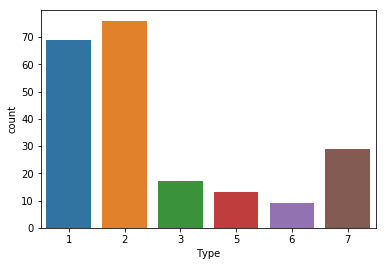

In [15]:
import seaborn as sns
sns.countplot(data['Type'],label="Count")
plt.show()

Selanjutnya,kita buat visualisasi dari data tersebut. 
### Box Plot
Box plot untuk setiap variabel numerik akan memberi kita gagasan yang lebih jelas tentang distribusi variabel input:

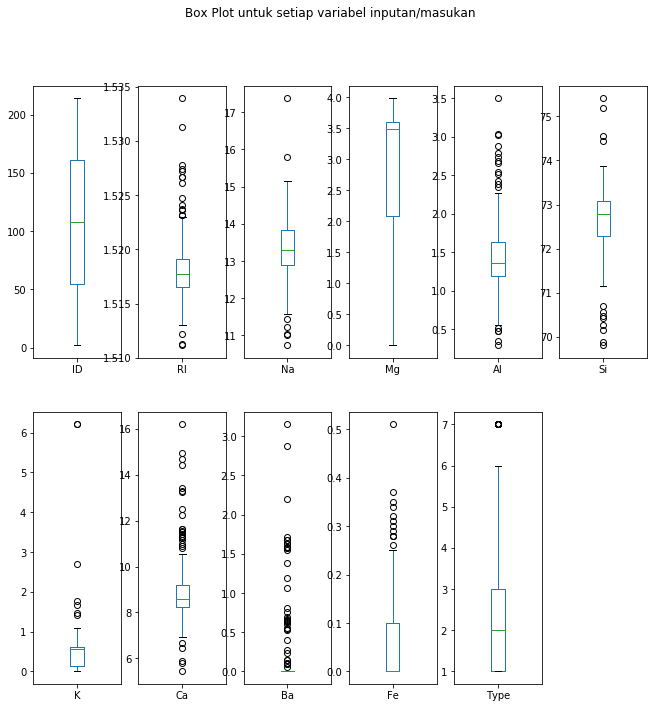

In [16]:
data.plot(kind='box', subplots=True, layout=(2,6), sharex=False, sharey=False, figsize=(11,11), 
                                        title='Box Plot untuk setiap variabel inputan/masukan')
plt.savefig('glass_box')
plt.show()

### Histogram

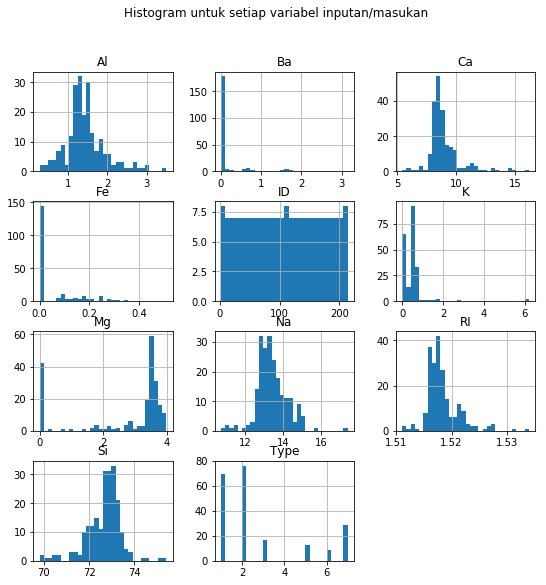

In [17]:
import pylab as pl
data.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram untuk setiap variabel inputan/masukan")
plt.savefig('data_hist')
plt.show()

Beberapa pasang atribut berkorelasi (RI dan Ca). Ini menunjukkan korelasi yang tinggi dan hubungan yang dapat diprediksi.

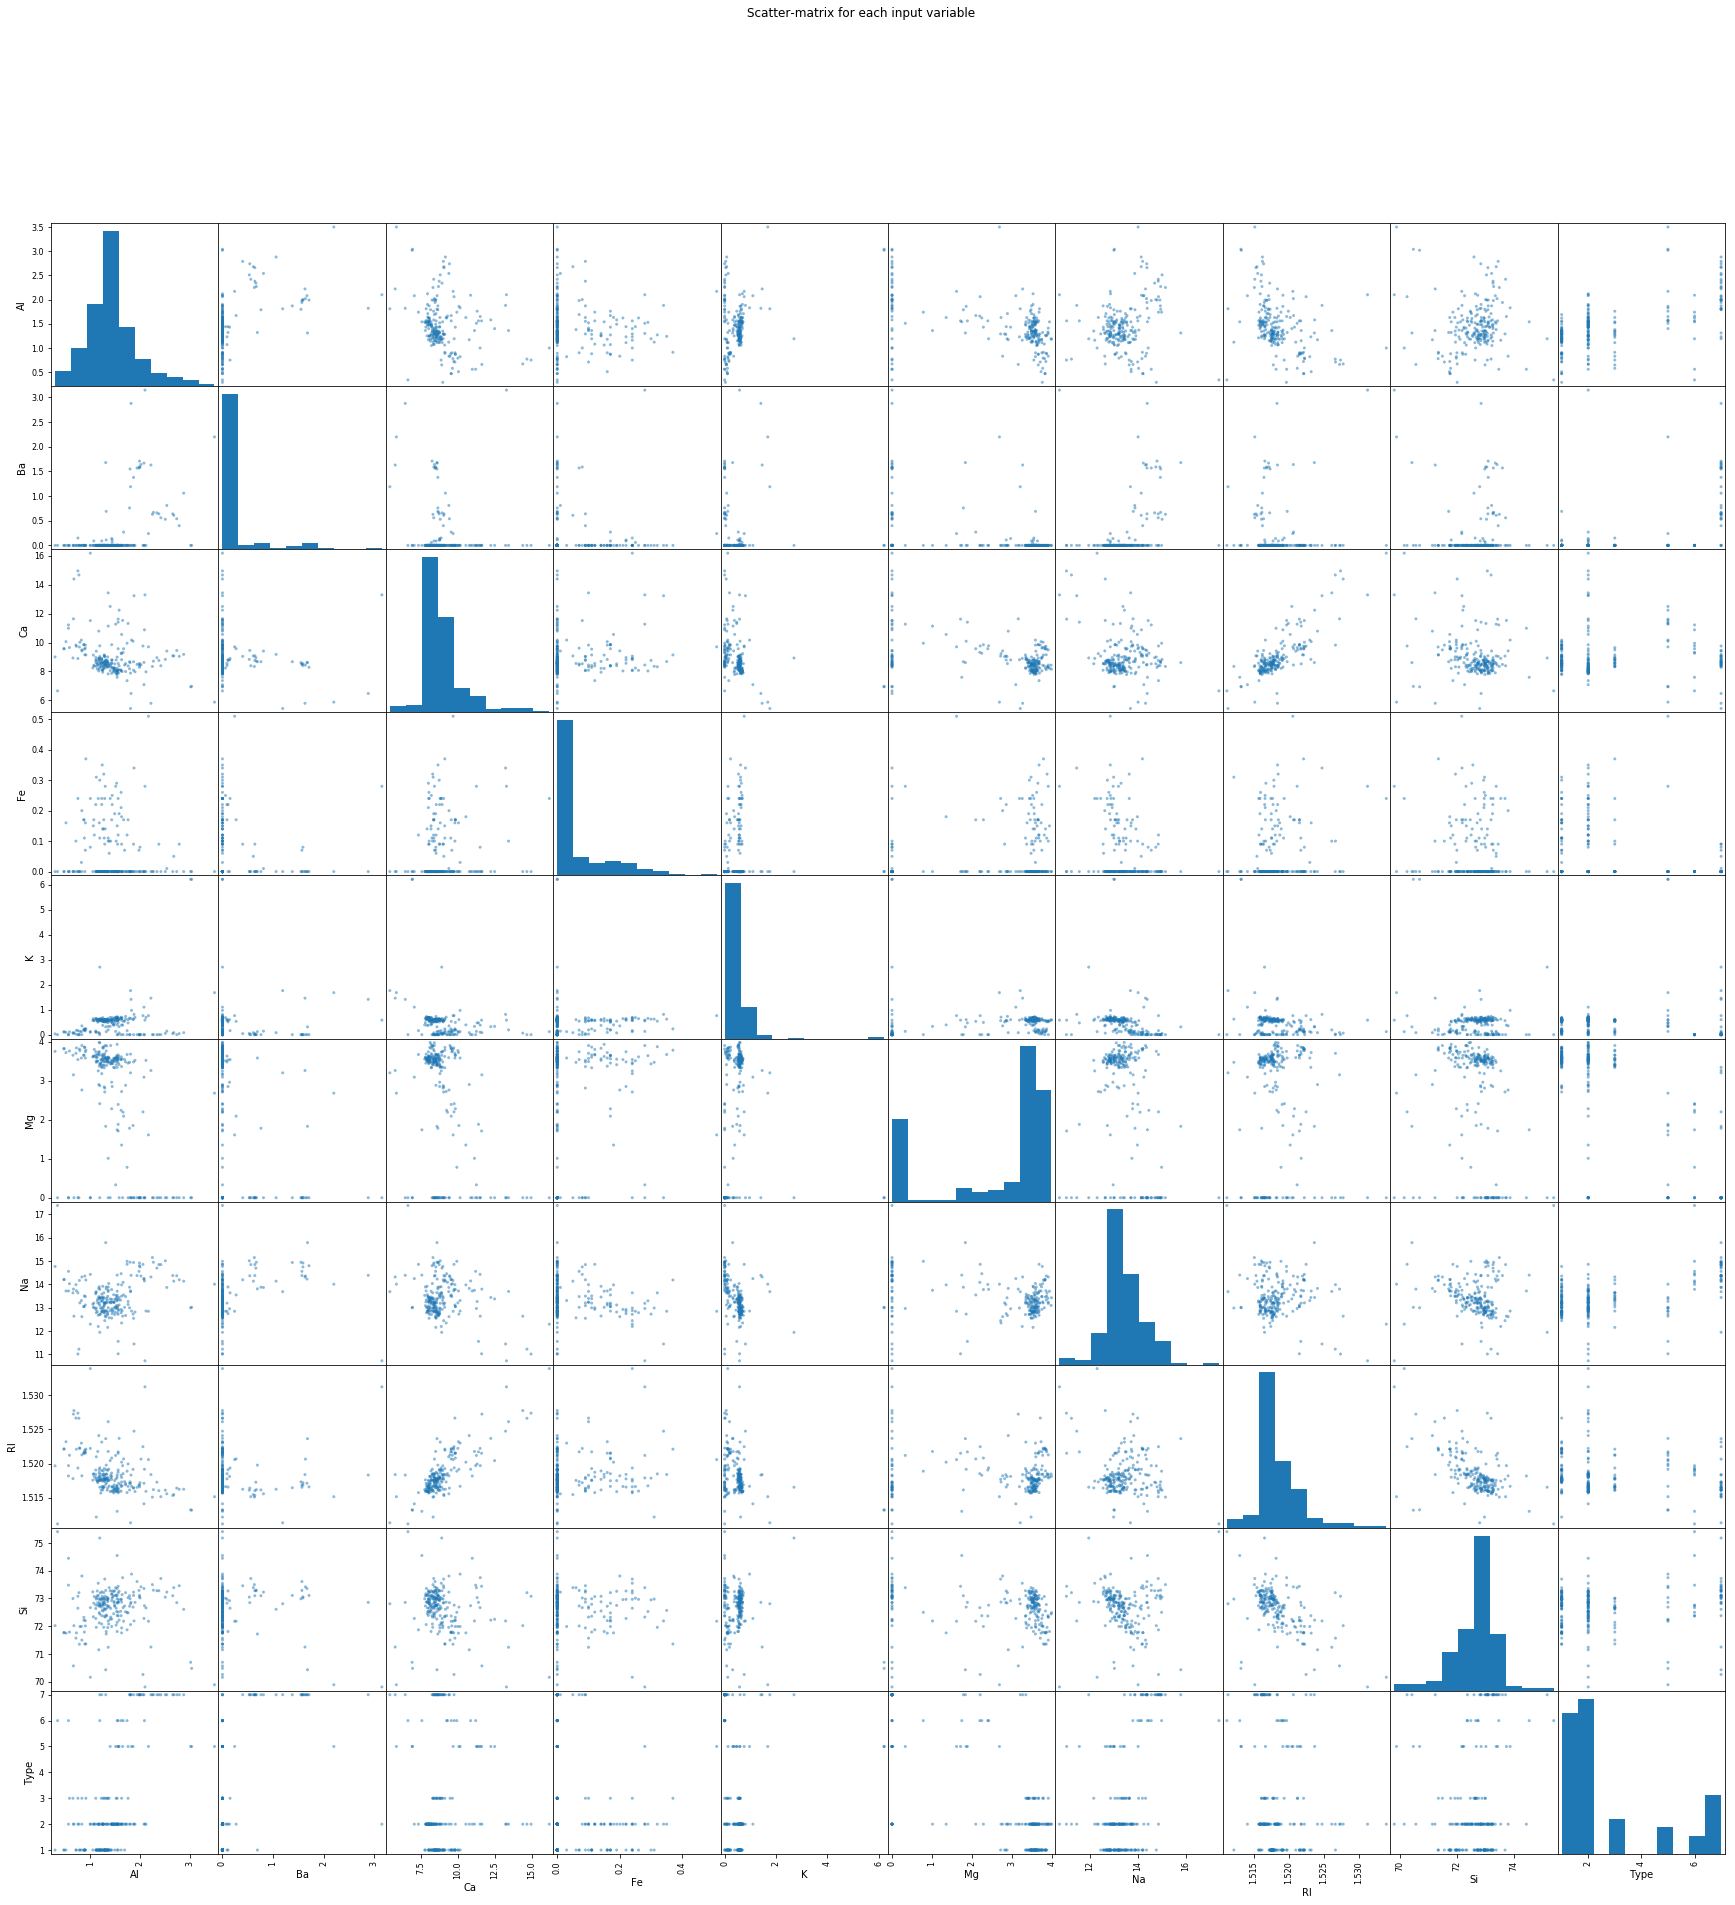

In [23]:
from pandas.plotting import scatter_matrix #aslinya: pandas.tools.plotting
from matplotlib import cm
feature_names = ['Al', 'Ba', 'Ca', 'Fe', 'K', "Mg","Na","RI","Si","Type"]
X = data[feature_names]
y = data[['Al', 'Ba', 'Ca', 'Fe', 'K', "Mg","Na","RI","Si","Type"]]
cmap = cm.get_cmap('gnuplot')
scatter =scatter_matrix(X,figsize=(30, 30))
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('glass_scatter_matrix')


Kita perlu menerapkan penskalaan pada set tes yang kita hitung untuk set pelatihan.

In [24]:
# Menyembunyikan Warning
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = data[['Type']]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}\n'.format(logreg.score(X_test, y_test)))

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}\n'.format(clf.score(X_test, y_test)))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}\n'
     .format(knn.score(X_test, y_test)))

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}\n'
     .format(lda.score(X_test, y_test)))

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}\n'
     .format(gnb.score(X_test, y_test)))

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.56
Accuracy of Logistic regression classifier on test set: 0.52

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.78

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.70

Accuracy of LDA classifier on training set: 0.67
Accuracy of LDA classifier on test set: 0.65

Accuracy of GNB classifier on training set: 0.57
Accuracy of GNB classifier on test set: 0.43

Accuracy of SVM classifier on training set: 0.51
Accuracy of SVM classifier on test set: 0.43
